In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys,os
sys.path.append('..')
from backtester import matlab, backtester
from backtester.analysis import *
from backtester.strategy import StrategyBase, OptParam, OptParamArray
from backtester.swarms.ranking import SwarmRanker
from backtester.swarms.rebalancing import SwarmRebalance
from backtester.swarms.filters import SwarmFilter
from backtester.costs import CostsManagerEXOFixed
from backtester.exoinfo import EXOInfo
from backtester.swarms.rankingclasses import *
from backtester.swarms.swarm import Swarm


import pandas as pd
import numpy as np
import scipy

In [3]:
from strategies.strategy_exo import StrategyEXO

In [4]:
from scripts.settings import *
try:
    from scripts.settings_local import *
except:
    pass

from exobuilder.data.exostorage import EXOStorage

storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)


exo_filter = '*'     # All 
#exo_filter = 'ES_'  # ES only
exo_filter = 'ES*'  # ES Collars (incl Bearish, Bullish, BW and vanilla)

[print(exo) for exo in storage.exo_list(exo_filter)];

ES_CallSpread
ES_PutSpread
ES_BullishCollarBW
ES_BearishCollarBW


## Script settings

In [5]:
STRATEGY_CONTEXT = {
    'strategy': { 
        'class': StrategyEXO,
        'exo_name': 'ES_CallSpread',        # <---- Select and paste EXO name from cell above
        'exo_storage': storage,        
        'opt_params': [
                        #OptParam(name, default_value, min_value, max_value, step)
                        OptParamArray('Direction', [1]),
                        
            ],
    },
    'swarm': {
        'members_count': 1,
        'ranking_class': RankingNoRanking(),
        'rebalance_time_function': SwarmRebalance.every_friday,

    },
    'costs':{
        'manager': CostsManagerEXOFixed,
        'context': {
            'costs_options': 3.0,
            'costs_futures': 3.0,
        }
    }
}

# Backtest class based strategy

### WARNING! Do not run next block if you want to load swarm from file!

In [6]:
smgr = Swarm(STRATEGY_CONTEXT)
smgr.run_swarm()
smgr.pick()

# Saving results to swarms directory
smgr.save('./swarms/')

### WARNING! Loading swarm from file (don't run next cell if you want new swarm instance)

In [7]:
#smgr = Swarm.load(strategy_context=STRATEGY_CONTEXT, directory='./swarms/')
#print('Loading: '+smgr.get_swarm_name())

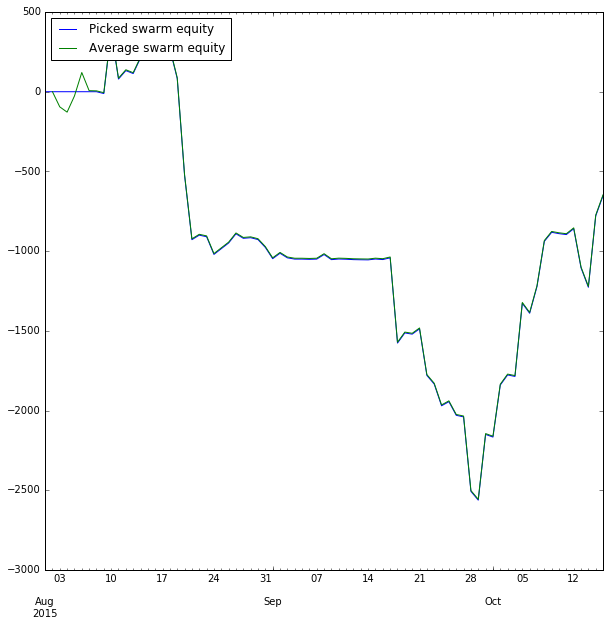

In [8]:
figsize(10,10)
smgr.picked_equity.plot(label='Picked swarm equity');
smgr.raw_equity.plot(label='Average swarm equity');
legend(loc=2);

In [10]:
exo_price, exo_info = storage.load_series(smgr.exo_name)

In [11]:
exo_price

,exo
2015-08-01,-481.347514
2015-08-02,-480.887303
2015-08-03,-576.301131
2015-08-04,-609.401822
2015-08-05,-508.335351
2015-08-06,-360.840696
2015-08-07,-474.844715
2015-08-08,-475.971631
2015-08-09,-487.480071
2015-08-10,-97.683720


# Compare pure exo price and EXO strategy equity

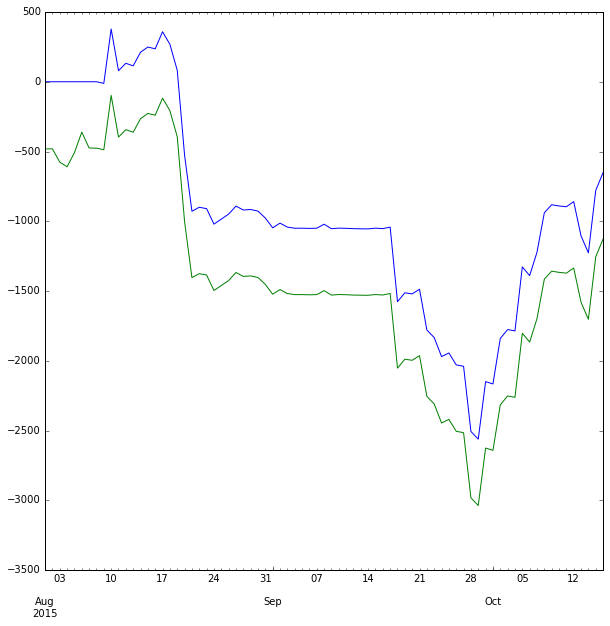

In [14]:
smgr.picked_equity.plot()
exo_price.exo.plot()

# EXO strategy and EXO index difference

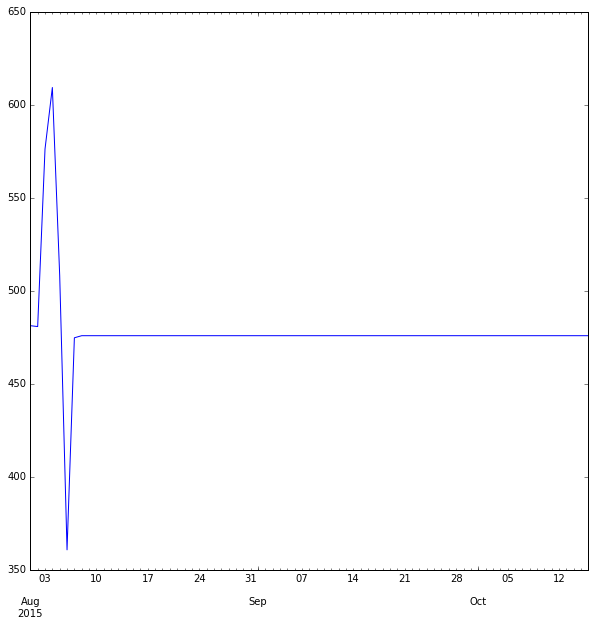

In [15]:
(smgr.picked_equity-exo_price.exo).plot()